<a href="https://colab.research.google.com/github/ethancma/GaussCircleConjecture/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Exploration 1 - Gauss's Circle Conjecture

The problem at hand was how to determine the number of integer lattice points that exist in a circle centered about the origin with some radius r. Throughout this notebook, we will explore a series of techniques through python to quickly find this number as well as expand our techniques to other shapes such as ellipses and spheres.

In [22]:
import math
import numpy as np
from numpy.polynomial import polynomial as P
import matplotlib.pyplot as plt

We begin with a no optimizations brute force approach that simply parses each $x$ value in the set $\{0, 1,...,r\}$, and each $y$ value in the set $\{1, ..., r\}$, and checks if $x^2+y^2 < r^2$ and if so adds it as a lattice point. However this only counts the lattice points in one quadrant of the circle, so we multiply the final count by 4, and finally we add 1 for the point $(0, 0)$ which is skipped.

In [ ]:
def bruteforce_L(r: int) -> int:
    """Brute force technique to determine the number of lattice points.
    
    :param r: radius of the circle
    :return: number of lattice points of circle with radius r
    """
    lattice_points = 0
    for i in range(r + 1):
        for j in range(1, r + 1):
            if i**2 + j**2 <= r**2:
                lattice_points += 1
    return 4 * lattice_points + 1


This function is to slow for large values, so we created a faster version. This version only loops through each $x$ in the set $\{1, 2,...,r\}$ and adds up the number of lattice points $(x, y)$ for which $y >= 0$ and $x^2 + y^2 <= r^2$, which turns out to equal $\lfloor\sqrt{r^2 - x^2}\rfloor + 1$. We add up all of these lattice points and then multiply the total by 4, and add one, for the same reason as above.
We also created an area and error function. 

In [ ]:
def A(r: int) -> float:
    """Calculates the area of the circle."""
    return r**2 * math.pi


def L(r: int) -> int:
    """Fast version of calculating the number of lattice points."""
    i = 1
    ans = 0
    while i <= r:
        ans += math.floor(math.sqrt(r**2 - i**2)) + 1
        i += 1
    return 1 + ans * 4


def E(r: int) -> float:
    """Calculates the error between the area and lattice points."""
    return A(r) - L(r)


To get a sense of how the error grows with R, we will perform a power regression on a list of values from the function E.

In [ ]:
errors = [E(i) for i in range(1, 1000)]
errors.insert(0, 0)

In [ ]:
from sklearn.linear_model import LinearRegression


x = []
y = []
print("Creating list of errors, in log space so we can do a linear regression")
for i in range(1, 1000):
  error = errors[i]
  if error > 0:
    x.append([math.log(i)])
    y.append(math.log(error))
print("Finished")
reg = LinearRegression(fit_intercept = False).fit(x,y)
reg.coef_

Creating list of errors, in log space so we can do a linear regression
Finished


array([0.63913903])

Plotting graphs so we can get a better look

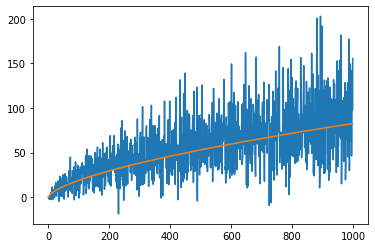

In [ ]:
import matplotlib.pyplot as plt


x = []
error_y = []
model = []

for i in range(1000):
    x.append(i)
    error_y.append(errors[i])
    model.append(i**(.63913903))

fig, ax = plt.subplots()
ax.plot(x, error_y)
ax.plot(x, model)
plt.show()

An obvious generalization of this problem that merits inspection is to see how this idea extends to shapes beyond circles. Furthermore, we will see how if this idea extends to volume as opposed to area. 

### **Finding area and Lattice points of an ellipse**

**Area of an ellipse**

To find the area of an ellipse, this is done by the simple equation $\pi \cdot a \cdot b$.

In [23]:
def ellipse_A(a: int, b: int) -> float:
  """Returns the area of the ellipse."""
  return math.pi * a * b

**Lattice points of an ellipse**

This method of finding the lattice points will, conceptually, draw a box around the ellipse and then check if each point is within the ellipse by checking if $\frac{x^2}{a^2}+\frac{y^2}{b^2} \le 1$, where the code checks $\forall (a, b) \in \mathbb{N}$.

In [24]:
def equation_satisfied(x, y, a, b):
  """Checks if the equation has been satisfied."""
  return (x**2) / (a**2) + (y**2) / (b**2) <= 1

def ellipse_L(a: int, b: int) -> int:
    """Calculates the number of lattice points of this ellipse a, b.
  
    :param a: major axis of ellipse
    :param b: minor axis of ellipse
    :return: number of lattice points
    """
    quad_one_points = 0
    i = 1
    while i < abs(a) + 1:
        j = 1
        while j < abs(b) + 1:
          if equation_satisfied(i, j, a, b):
            quad_one_points += 1
          j += 1
        i += 1
    axis_points = (a + b) * 2 + 1
    return quad_one_points * 4 + axis_points

In [25]:
a = 10
b = 13
print("--> The lattice points of an elipse with values (a,b) = ({},{}) is {}.".format(a, b, ellipse_L(a, b)))

--> The lattice points of an elipse with values (a,b) = (10,13) is 403.


**Lattice points of ellipse (fast)**

The following code can be slightly faster to the above code. However, this code relies on checking the height of the ellipse of each x $\in$ [0, a-1] within the first coordinate. Depending on (a, b) values of the ellipse, this may or may not be significant. The following code floors the height of the ellipse on each integer x value within the first quadrant. It does this by checking $f(x)= ⌊\frac{b}{a}\sqrt(a^2-x^2)⌋$

It's worth noting an attempt was bade to somehow use the formula to a fast circle, which is $N(r) = 1 + 4⌊r⌋ + 4 \cdot \Sigma_{i=1}^{⌊r⌋} ⌊\sqrt(x^2-i^2)⌋$ $^{(1)}$, however since this equation is based off of Number Theory and the Sum of Squares $^{(2)}$, it wouldn't be feasible to modify this equation to fit ellipses without going very much indepth into Number Theory.

$^{(1)}$ Source: https://mathworld.wolfram.com/GausssCircleProblem.html

$^{(2)}$ Source: https://en.wikipedia.org/wiki/Sum_of_squares_function#:~:text=In%20number%20theory%2C%20the%20sum,counted%20as%20different%2C%20and%20is

In [26]:
def ellipse_func(x, a, b):
  return math.floor((b/a)*math.sqrt((a**2)-(x**2)))

def fast_ellipse_L(a, b):
  n = 1
  sum = 0
  while n < a:
    sum += ellipse_func(n, a, b)
    n+=1
  return sum

In [27]:
a = 10
b = 13
print("--> The lattice points of an elipse with values (a,b) = ({},{}) is {}.".format(a, b, ellipse_L(a, b)))

--> The lattice points of an elipse with values (a,b) = (10,13) is 403.


## Volume of a sphere

In [ ]:
def volume_sphere(r: int) -> float:
    """Calculates the volume of the sphere.
    
    :param r: radius of sphere
    :return: volume of sphere
    """
    return (4 / 3) * math.pi * r**3


def bf_lattice_sphere(r: int) -> int:
    """Brute force method to calculate lattice points of sphere.
    
    :param r: radius of sphere
    :return: lattice points of sphere
    """
    lattice_points = 0
    for i in range(-r, r + 1):
        for j in range(-r, r + 1):
            for k in range(-r, r + 1):
                if i**2 + j**2 + k**2 <= r**2:
                    lattice_points += 1
    return lattice_points


def faster_bf_lattice_sphere(r: int) -> int:
    """More efficient brute force method to calculate lattice points.
    
    :param r: radius of sphere
    :return: lattice points of sphere
    """
    nonzero_lattice_points = 0
    for i in range(1, r + 1):
        for j in range(1, r + 1):
            for k in range(1, r + 1):
                if i**2 + j**2 + k**2 <= r**2:
                    nonzero_lattice_points += 1
  
    # points sitting on 0 axis interior to sphere
    nonzero_lattice_points *= 8
    # points sitting on 1 or 2 axis interior to the sphere
    axis_circles = 3 * (bruteforce_L(r) - 1)
    # points sitting on 2 axis interior to sphere
    overcounted_axis_lines = 6 * r
    # points sitting on all 3 axis interior to sphere
    origin = 1 
    return nonzero_lattice_points + axis_circles - overcounted_axis_lines + origin

We take a similar approach as before, but now we have 3 different dimensions to loop over. We only deal with strictly positive lattice points, and by symmetry uncounted lattice points can be found by switching the sign on points i,j,k. This gives us 2^3 = 8 different unique lattice points for given positive lattice point (i,j,k). We begin with a brute force approach as before.

This method is quite slow, so we will try to create a more efficent version.

In [ ]:
def lattice_sphere(r: int) -> int:
    """Fast method to calculate lattice points of sphere.
    
    :param r: radius of sphere
    :return: lattice points of sphere
    """
    nonzero_lattice_points = 0
    for i in range(1, r + 1):
        for j in range(1, math.floor(math.sqrt(r**2 - i**2)) + 1):
            nonzero_lattice_points += math.floor(math.sqrt(r**2 - i**2 - j**2))

    # points sitting on 0 axis interior to sphere
    nonzero_lattice_points *= 8
    # points sitting on 1 or 2 axis interior to the sphere
    axis_circles = 3 * (L(r) - 1)
    # points sitting on 2 axis interior to sphere
    overcounted_axis_lines = 6 * r
    # points sitting on all 3 axis interior to sphere
    origin = 1
    return nonzero_lattice_points + axis_circles - overcounted_axis_lines + origin

This implementation is much faster, cutting down on the upper bound on the 2nd loop and getting rid of the third loop completely. We will now populate an array with error values from radius 1 through 1000.

In [ ]:
def sphere_error(r: int) -> float:
    """Calculates error between volume and lattice points of sphere.
    
    :param r: radius of sphere
    :return: margin of error
    """
    return volume_sphere(r)  - lattice_sphere(r)

errors_sphere = [sphere_error(i) for i in range(1, 1000)]
errors_sphere.insert(0, 0)

In [ ]:
from sklearn.linear_model import LinearRegression


x = []
y = []
print("Creating list of errors, in log space so we can do a linear regression")
for i in range(1, 1000):
    error = errors_sphere[i]
    if error > 0:
        x.append([math.log(i)])
        y.append(math.log(error))
print("Finished")

reg = LinearRegression(fit_intercept=False).fit(x,y)
reg.coef_


Creating list of errors, in log space so we can do a linear regression
Finished


array([1.32307423])

We have all the information that we need now to create a linear regression for the error term.

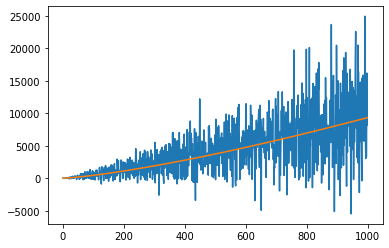

In [ ]:
import matplotlib.pyplot as plt


x = []
error_y = []
model = []

for i in range(1000):
    x.append(i)
    error_y.append(errors_sphere[i])
    model.append(i**1.32307423)
fig, ax = plt.subplots()
ax.plot(x, error_y)
ax.plot(x, model)
plt.show()

As you can see in the graph above, and by noting that growth of the error term is proportional to r^(1.32), the error term is only getting larger as the radius increases. With the circle lattice error term, the error was growing at a slower rate, proportional to r^(2/3). This difference in the error terms growth rate is very interesting, and is most likely the result of how quickly volume accumulates versus area.

An interesting result due to D.R. Heath-Brown (https://www.degruyter.com/document/doi/10.1515/9783110285581.883/html?lang=en) establishes a lower bound on the error rate as being proportional to r^(1.3125). This number is very close to the value we calculated above. To illustrate this, examine the graph of both error rates below.

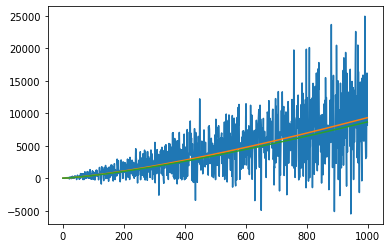

In [ ]:
import matplotlib.pyplot as plt


x = []
error_y = []
model = []
heath = []
for i in range(1000):
    x.append(i)
    error_y.append(errors_sphere[i])
    model.append( i**(1.32307))
    heath.append(i**(1.3125))

fig, ax = plt.subplots()
ax.plot(x, error_y)
ax.plot(x, model)
ax.plot(x, heath)
plt.show()